<a href="https://colab.research.google.com/github/tvaditya/ufgnlp/blob/master/ufgecomm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# from google.colab import drive 
# drive.mount('/content/gdrive')


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(style="ticks")
warnings.filterwarnings("ignore")

In [4]:
# Bibliotecas do keras
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [5]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(27759, 4)


,review_id,review_comment_message,review_creation_date,review_score
0,75821c5c8a5c0c6eac2f4c92a9c1fdd6,O produto foi entregue bem antes do prazo.adorei,2017-11-29 00:00:00,5.0
1,033baa4238fcac803931108093d2456a,Prazo não foi cumprido ... até hoje não chegou...,2016-12-01 00:00:00,1.0
2,81fc60dcc93fccd7c1bc96736c7b3ede,recomendo,2017-11-26 00:00:00,5.0
3,f19a67f2e44ecb90c8f7a36efbae78d3,"Chegou no tempo certo, produto bem embalado, s...",2017-10-21 00:00:00,5.0
4,dc05b3529d4387165a606b6583d67ed5,"Recomendo sim, além de chegar antes do prazo e...",2017-10-11 00:00:00,5.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27759 entries, 0 to 27758
Data columns (total 4 columns):
review_id                 27758 non-null object
review_comment_message    27759 non-null object
review_creation_date      27758 non-null object
review_score              27757 non-null float64
dtypes: float64(1), object(3)
memory usage: 867.5+ KB


Text(0, 0.5, 'Review Score')

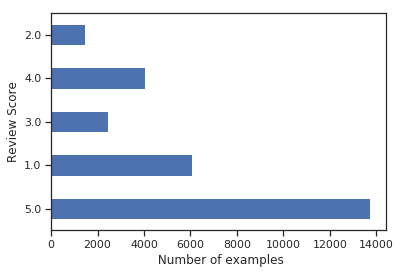

In [9]:
ax = df['review_score'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel(" Number of examples")
ax.set_ylabel("Review Score")


In [10]:
dft = pd.read_csv('test.csv')
print(dft.shape)
dft.head()

(13673, 3)


,review_id,review_comment_message,review_creation_date
0,53d9b256be0d4f6be6806dcaae2efdc4,Recomendo muito! Chegou tudo certo e antes do ...,2018-05-03 00:00:00
1,77a64cd9d85fa3693f7b07ad14b9702d,"Fiz a compra do produto, o mesmo não chegou no...",2017-12-29 00:00:00
2,56b7452646cbff8a680c948b7fcceb9c,bom produto,2018-01-09 00:00:00
3,202beb116c623e7006740695e0d86694,Dia 06/06/2018 efetuei a compra de 2 capas cas...,2018-06-13 00:00:00
4,6035b5360d50887471b8f12ae1beda70,Comprei e paguei por dois produtos iguais e só...,2018-01-04 00:00:00


In [0]:
def preprocessar(texto):

    # Pontuaçao e numeros
    txt = re.sub('[^a-zA-Z]', ' ', txt)

    # Tirar um unico caracter
    txt = re.sub(r"\s+[a-zA-Z]\s+", ' ', txt)

    # Espacos multiplos
    txt = re.sub(r'\s+', ' ', txt)

    return txt

In [0]:
## Definição de alguns parâmetros dos modelos e tokenização

# Tamanho da sequencia
seq_size     = 5

# Máximo de tokens 
max_tokens   = 100

# Tamanho do embedding
embed_dim    = 5

In [0]:
## Utilizaremos apenas o .review_comment_message (input) e o .review_score (target) da nossa rede
# Textos
text         = df['review_comment_message'].values
tokenizer    = Tokenizer(num_words=max_tokens, split=' ')

# Transforma o texto em números
tokenizer.fit_on_texts(text)
X = tokenizer.texts_to_sequences(text)  

# Cria sequencias de tamanho fixo (input: X)
X = pad_sequences(X, maxlen=seq_size)

# Target (review_score)
Y = df['review_score'].values

'O produto foi entregue bem antes do prazo.adorei'